Yizhi Jiao
PHYS 29
Homework 7

Problem 1

In [53]:
import numpy as np
from scipy import special
from matplotlib import pyplot as plt

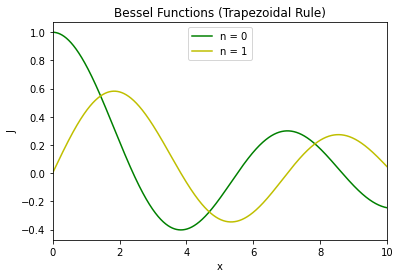

In [54]:
x = np.linspace(0,10, 10000)
j_0 = np.linspace(0,10, 10000)
j_1 = np.linspace(0,10, 10000)

for i in range(0, 10000):
    N = 100
    a = 0
    b = np.pi
    h = (b-a)/N
    t = np.arange(N+1)*h
    f_0 = np.cos(0*t-x[i]*np.sin(t))
    I_0=0.5*h*(f_0[0]+f_0[N])+h*np.sum(f_0[1:N])
    j_0[i] = I_0/np.pi
    f_1 = np.cos(1*t-x[i]*np.sin(t))
    I_1=0.5*h*(f_1[0]+f_1[N])+h*np.sum(f_1[1:N])
    j_1[i] = I_1/np.pi

plt.title('Bessel Functions (Trapezoidal Rule)')
plt.plot(x, j_0, color='g', label='n = 0')
plt.plot(x, j_1, color='y', label='n = 1')

plt.legend(loc='upper center')
plt.ylabel('J')
plt.xlabel('x')
plt.xlim(0,10)
plt.show()

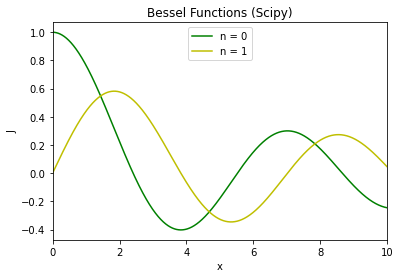

In [55]:
j_0 = special.jv(0, x)
j_1 = special.jv(1, x)

plt.title('Bessel Functions (Scipy)')
plt.plot(x, j_0, color='g', label='n = 0')
plt.plot(x, j_1, color='y', label='n = 1')

plt.legend(loc='upper center')
plt.ylabel('J')
plt.xlabel('x')
plt.xlim(0,10)
plt.show()

Problem 2(a)

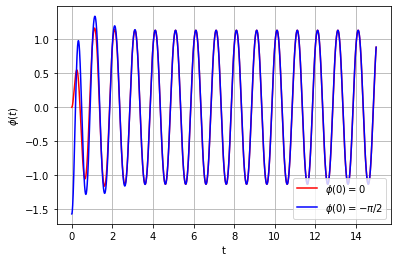

In [56]:
phi00 = np.array([0, -np.pi/2])
phi10 = 0
gamma = 0.6
def pendode(phi0, phi1, t):
    dphi0dt = phi1
    dphi1dt = -9. * np.pi**2 * np.sin(phi0) - 2 * 3 * np.pi / 4 * phi1 + gamma * 9 * np.pi**2 * np.cos(2*np.pi * t)
    return np.array([dphi0dt, dphi1dt])

dt=0.001
nt=15001
t=np.arange(nt)*dt
phi=np.zeros(nt)
phidot=np.zeros(nt)
phidot[0]=phi10

k1=np.zeros(2)
k2=np.zeros(2)
k3=np.zeros(2)
k4=np.zeros(2)
for i in range(2):
    phi[0]=phi00[i]
    for it in range(nt-1):
        k1 = dt * pendode(phi[it], phidot[it], t[it])
        k2 = dt * pendode(phi[it]+0.5*k1[0], phidot[it]+0.5*k1[1], t[it])
        k3 = dt * pendode(phi[it]+0.5*k2[0], phidot[it]+0.5*k2[1], t[it])
        k4 = dt * pendode(phi[it]+k3[0], phidot[it]+k3[1], t[it])
        phi[it+1] = phi[it] + k1[0]/6. + k2[0]/3. + k3[0]/3. + k4[0]/6.
        phidot[it+1] = phidot[it] + k1[1]/6. + k2[1]/3. + k3[1]/3. + k4[1]/6.
    if phi[0]==phi00[0]:
        plt.plot(t, phi, label='$\\phi(0)=$'+'$0$', color='r')
    else:
        plt.plot(t, phi, label='$\\phi(0)=$'+'$-\\pi/2$', color='b')
plt.xlabel('t')
plt.ylabel('$\\phi(t)$')
plt.grid()
plt.legend()
plt.show()

After enough time passed, red trajectory and blue trajectory combined to form purple trajectory.

Problem 2(b)

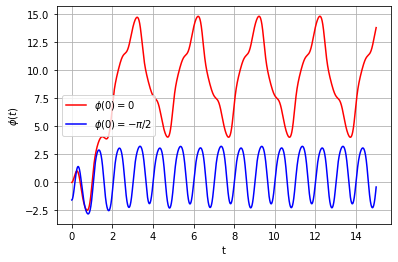

In [95]:
phi00 = np.array([0, -np.pi/2])
phi10 = 0
gamma = 1.077

def pendode(phi0, phi1, t):
    dphi0dt = phi1
    dphi1dt = -9. * np.pi**2 * np.sin(phi0) - 2 * 3 * np.pi / 4 * phi1 + gamma * 9 * np.pi**2 * np.cos(2*np.pi * t)
    return np.array([dphi0dt, dphi1dt])

dt=0.001
nt=15001
t=np.arange(nt)*dt
phi=np.zeros(nt)
phidot=np.zeros(nt)
phidot[0]=phi10

k1=np.zeros(2)
k2=np.zeros(2)
k3=np.zeros(2)
k4=np.zeros(2)
for i in range(2):
    phi[0]=phi00[i]
    for it in range(nt-1):
        k1 = dt * pendode(phi[it], phidot[it], t[it])
        k2 = dt * pendode(phi[it]+0.5*k1[0], phidot[it]+0.5*k1[1], t[it])
        k3 = dt * pendode(phi[it]+0.5*k2[0], phidot[it]+0.5*k2[1], t[it])
        k4 = dt * pendode(phi[it]+k3[0], phidot[it]+k3[1], t[it])
        phi[it+1] = phi[it] + k1[0]/6. + k2[0]/3. + k3[0]/3. + k4[0]/6.
        phidot[it+1] = phidot[it] + k1[1]/6. + k2[1]/3. + k3[1]/3. + k4[1]/6.
    if phi[0]==phi00[0]:
        plt.plot(t, phi, label='$\\phi(0)=$'+'$0$', color='r')
    else:
        plt.plot(t, phi, label='$\\phi(0)=$'+'$-\\pi/2$', color='b')
plt.xlabel('t')
plt.ylabel('$\\phi(t)$')
plt.grid()
plt.legend()
plt.show()

As time passed, red trajectory and blue trajectory did not end up with the same trajectory.